# Chess




In [1]:
import chess
import chess.pgn

In [2]:
import os
files = os.listdir('games')
files[0]

'jimmy1700.txt'

## basic chess commands

In [3]:
pgn = open('games/slevin48_vs_GraciasSenior_2020.11.22.pgn')

In [4]:
first_game = chess.pgn.read_game(pgn)

In [5]:
first_game.headers["Event"]

'Live Chess'

In [6]:
first_game.headers["White"],first_game.headers["Black"]

('slevin48', 'GraciasSenior')

In [7]:
first_game.mainline_moves()

<Mainline at 0x7f756845f400 (1. d4 d5 2. Nc3 Nf6 3. e3 Bg4 4. f3 Bf5 5. Bb5+ Nc6 6. g4 a6 7. Ba4 b5 8. Nxb5 axb5 9. Bxb5 Qd7 10. gxf5 e6 11. e4 dxe4 12. fxe4 Nxe4 13. c4 Bb4+ 14. Kf1 Ra5 15. a3 O-O 16. d5 exd5 17. cxd5 Qxf5+ 18. Ke2 Qf2+ 19. Kd3 Ne5+ 20. Kxe4 Re8 21. Bxe8 Ng6 22. Bd2 Bxd2 23. Nf3 Ra4+ 24. Bxa4 Bg5 25. Nxg5 Qf4+ 26. Kd3 Qxg5 27. Rg1 Ne5+ 28. Kc2 Qe3 29. Re1 Qd3+ 30. Kc1 Qc4+ 31. Bc2 Nf3 32. Re8#)>

In [12]:
board0 = first_game.board()
# board0

In [13]:
moves = [move for move in first_game.mainline_moves()]
moves[0]

Move.from_uci('d2d4')

In [14]:
board0.push(moves[0])

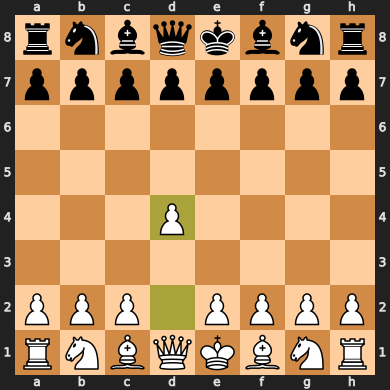

In [15]:
board0

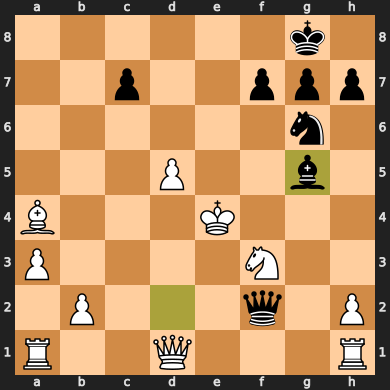

In [16]:
# Move 48
board = first_game.board()
# Iterate through all moves and play them on a board
for move in moves[0:48]:
    board.push(move)
board

In [17]:
board.fen()

'6k1/2p2ppp/6n1/3P2b1/B3K3/P4N2/1P3q1P/R2Q3R w - - 1 25'

In [18]:
for move in first_game.mainline_moves():
    print(move)

d2d4
d7d5
b1c3
g8f6
e2e3
c8g4
f2f3
g4f5
f1b5
b8c6
g2g4
a7a6
b5a4
b7b5
c3b5
a6b5
a4b5
d8d7
g4f5
e7e6
e3e4
d5e4
f3e4
f6e4
c2c4
f8b4
e1f1
a8a5
a2a3
e8g8
d4d5
e6d5
c4d5
d7f5
f1e2
f5f2
e2d3
c6e5
d3e4
f8e8
b5e8
e5g6
c1d2
b4d2
g1f3
a5a4
e8a4
d2g5
f3g5
f2f4
e4d3
f4g5
h1g1
g6e5
d3c2
g5e3
g1e1
e3d3
c2c1
d3c4
a4c2
e5f3
e1e8


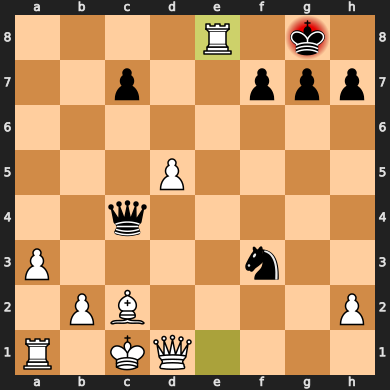

In [19]:
board = first_game.board()
# Iterate through all moves and play them on a board
for move in first_game.mainline_moves():
    board.push(move)
board

In [20]:
board.fen()

'4R1k1/2p2ppp/8/3P4/2q5/P4n2/1PB4P/R1KQ4 b - - 11 32'

## Chessviz

In [17]:
from chessviz import *
# chessviz.fentotensor((board.fen()))
countpieces(board.fen())

16.0

In [18]:
import chess.uci

engine = chess.uci.popen_engine("stockfish_20090216_x64.exe")
engine.uci()
engine.name

'Stockfish 12'

In [19]:
# Register a standard info handler.
info_handler = chess.uci.InfoHandler()
engine.info_handlers.append(info_handler)

In [64]:
counts ={"movecount":[],"scores":[],"check":[],"bestdiff":[],"pawnending":[],"rookending":[]}

In [68]:
# Iterate through all moves and play them on a board.
board = first_game.board()
# go to move 48
for move in moves[0:48]:
    board.push(move)

cnt = len([i for i in board.legal_moves])
counts["movecount"].append(cnt)
cnt,board.is_check(),pawnending(board.fen()),rookending(board.fen())
# board

(37, False, False, False)

In [69]:
engine.position(board)

In [70]:
# Start a search.
engine.position(board)
engine.go(movetime=100)
if board.turn == chess.WHITE:
    info_handler.info["score"][1][0]
else:
    -info_handler.info["score"][1][0]
nextmovescores = []

In [71]:
board.turn == chess.WHITE

True

In [72]:
info_handler.info["score"][1][0]

1183

In [73]:
for mov in board.legal_moves:
    board.push(mov)
    engine.position(board)
    engine.go(movetime=100)
    if board.turn == chess.WHITE:
        if info_handler.info["score"][1][0] != None:
            nextmovescores.append(info_handler.info["score"][1][0])
    elif board.turn == chess.BLACK:
        if info_handler.info["score"][1][0] != None:
            nextmovescores.append(-info_handler.info["score"][1][0]) 
    board.pop()

In [74]:
nextmovescores

[-213, 930, 1157, 1017, 856, 746, -1112, -664, 0, 684, -325, 1025]

In [75]:
nextmovescores.sort(reverse=True)
nextmovescores[0]

1157

In [76]:
counts ={"movecount":[],"scores":[],"check":[],"bestdiff":[],"pawnending":[],"rookending":[]}

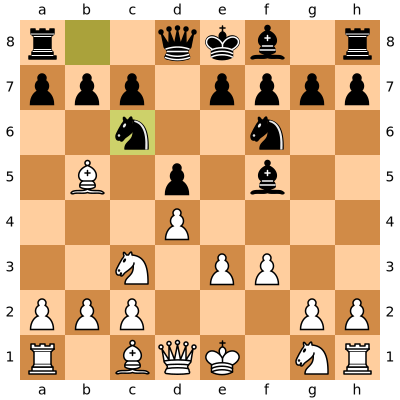

In [77]:
board = first_game.board()
# Iterate through all moves and play them on a board
for move in moves[0:10]:
    board.push(move)
    cnt = len([i for i in board.legal_moves])
    counts["movecount"].append(cnt)
    counts["check"].append(board.is_check())
    counts["pawnending"].append(pawnending(board.fen()))
    counts["rookending"].append(rookending(board.fen()))
    
    # Start a search.
    engine.position(board)
    engine.go(movetime=100)
    if board.turn == chess.WHITE:
        counts["scores"].append(info_handler.info["score"][1][0])
    else:
        counts["scores"].append(-info_handler.info["score"][1][0])
    nextmovescores = []
    
    for mov in board.legal_moves:
        board.push(mov)
        engine.position(board)
        engine.go(movetime=100)
        if board.turn == chess.WHITE:
            if info_handler.info["score"][1][0] != None:
                nextmovescores.append(info_handler.info["score"][1][0])
        elif board.turn == chess.BLACK:
            if info_handler.info["score"][1][0] != None:
                nextmovescores.append(-info_handler.info["score"][1][0]) 
        board.pop()

    if len(nextmovescores) > 1:
        nextmovescores.sort(reverse=True)
        counts["bestdiff"].append(nextmovescores[0]-nextmovescores[1])
    else:
        counts["bestdiff"].append(0) 
board

In [78]:
import chart_studio.plotly as py
import plotly.graph_objs as go

checkcolor = ['red' if i else 'white' for i in counts["check"]]
checknr = [i for (i,s) in enumerate(counts["check"]) if s]
bubble = [s/2 for s in counts["movecount"]]
best = [np.log(s+1) for s in counts["bestdiff"]]

rookcolor = ['blue' if i else 'white' for i in counts["rookending"]]
pawncolor = ['green' if i else 'white' for i in counts["pawnending"]]

In [79]:
# We prepare lists of shapes to show the different phases of the game and if the king is in check.
shapes= []
lists =[checkcolor, rookcolor, pawncolor]
for (i,list) in enumerate(lists):
    shapes = shapes + [
            dict(
                    type = 'rect',
                    # x-reference is assigned to the x-values
                    xref = 'x',
                    # y-reference is assigned to the plot paper [0,1]
                    yref = 'paper',
                    x0 = i,
                    y0 = 0,
                    x1 = i+1,
                    y1 = 1,
                    fillcolor = s,
                    opacity = 0.2,
                    line = dict(
                        width = 0,
                    )
                )
                for (i,s) in enumerate(list)]

In [80]:
annotations = [ dict(
                    xref = 'x',
                    yref = 'paper',
                    x = s,
                    y = (0.05 + i*0.2) % 1,
                    text = 'Check!',
                    opacity = 0.8,
                    xanchor = 'left',
                    showarrow = False,
                    ax = 20,
                    ay = -30,
                    font = dict(
                        family = 'Courier New, monospace',
                        size = 16,
                        color = 'red'
                    ),
                )
                for (i,s) in enumerate(checknr)]

In [81]:
trace1 = go.Scatter(
    mode = 'markers+lines',
    y = counts["scores"],
    name = 'Scores',
    
    line = dict(
        color = ('black'),
        width = 4,
    ),
    marker = dict(
        size = bubble,
        line = dict(color = 'rgb(231, 99, 250)',width = 1),
        cmax=max(best),
        cmin=min(best),
        color=best,
        colorbar=dict(title='Critical Move'),
        colorscale='Jet'
    )
)


data = [trace1]

layout = dict(title = first_game.headers["Event"] + " / " + first_game.headers["White"] + " - " 
              + first_game.headers["Black"] + "  " + first_game.headers["Result"] + " / " 
              + first_game.headers["Date"],
              xaxis = dict(title = 'Move'),
              yaxis = dict(title = 'Score'),
              shapes = shapes,
              annotations = annotations
        )

fig = {
    'data': data,
    'layout': layout,
}

py.iplot(fig, filename = 'chessviz')

## Analysing and evaluating a position
https://python-chess.readthedocs.io/en/latest/engine.html#analysing-and-evaluating-a-position

In [21]:
pgn = open('games/slevin48_vs_GraciasSenior_2020.11.22.pgn')
first_game = chess.pgn.read_game(pgn)
board = first_game.board()
# Iterate through all moves and play them on a board
for move in first_game.mainline_moves():
    board.push(move)
# board

In [22]:
first_game.headers["White"],first_game.headers["Black"]

('slevin48', 'GraciasSenior')

In [23]:
# Move 48
board = first_game.board()
moves = [move for move in first_game.mainline_moves()]

# Iterate through all moves and play them on a board
for move in moves[0:48]:
    board.push(move)
# board

In [24]:
import chess.engine
engine = chess.engine.SimpleEngine.popen_uci("/usr/games/stockfish")
info = engine.analyse(board, chess.engine.Limit(time=0.1))
print("Score:", info["score"])
engine.quit()

Score: PovScore(Cp(+1147), WHITE)


In [25]:
info

{'depth': 11,
 'seldepth': 21,
 'multipv': 1,
 'score': PovScore(Cp(+1147), WHITE),
 'nodes': 125992,
 'nps': 1247445,
 'tbhits': 0,
 'time': 0.101,
 'pv': [Move.from_uci('d1b3'),
  Move.from_uci('g5f6'),
  Move.from_uci('b3b8'),
  Move.from_uci('g6f8'),
  Move.from_uci('b8c7'),
  Move.from_uci('f6b2'),
  Move.from_uci('a1f1'),
  Move.from_uci('f2g2'),
  Move.from_uci('h1g1'),
  Move.from_uci('g2e2'),
  Move.from_uci('e4f4'),
  Move.from_uci('b2a3'),
  Move.from_uci('f4g3'),
  Move.from_uci('e2d3')]}

In [73]:
engine = chess.engine.SimpleEngine.popen_uci("/usr/games/stockfish")    
score = chess.engine.PovScore(Cp(+1147),chess.WHITE)
print(score)
engine.quit()

PovScore(Cp(+1147), WHITE)


In [74]:
score.pov(chess.WHITE)

Cp(+1147)

In [36]:
score.white()

Cp(+1147)

In [38]:
score.wdl()

PovWdl(Wdl(wins=1000, draws=0, losses=0), WHITE)

In [41]:
score.white().score()

1147

In [43]:
import chess
import chess.engine
engine = chess.engine.SimpleEngine.popen_uci("/usr/games/stockfish")
pgn = open('games/slevin48_vs_GraciasSenior_2020.11.22.pgn')
first_game = chess.pgn.read_game(pgn)
board = first_game.board()
score = []
# Iterate through all moves and play them on a board
for move in first_game.mainline_moves():
    board.push(move)
    info = engine.analyse(board, chess.engine.Limit(time=0.1))
    score.append(info["score"].white().score())
    # print("Score:", info["score"].white().score())
# board
engine.quit()
score

[9,
 83,
 -20,
 57,
 -39,
 83,
 -33,
 84,
 -51,
 52,
 5,
 491,
 -62,
 92,
 -283,
 -256,
 -315,
 282,
 224,
 261,
 194,
 297,
 202,
 301,
 -62,
 24,
 -27,
 207,
 87,
 83,
 -254,
 -243,
 -1020,
 -661,
 None,
 None,
 None,
 None,
 None,
 239,
 155,
 983,
 -502,
 104,
 None,
 -16,
 None,
 1169,
 1171,
 1216,
 1214,
 1244,
 1152,
 1218,
 1199,
 1278,
 1280,
 4184,
 1265,
 1735,
 1283,
 None,
 None]

In [44]:
import pandas as pd
df = pd.DataFrame(score,columns=['score'])
df

,score
0,9.0
1,83.0
2,-20.0
3,57.0
4,-39.0
...,...
58,1265.0
59,1735.0
60,1283.0
61,NaN


In [57]:
df.isna()

,score
0,False
1,False
2,False
3,False
4,False
...,...
58,False
59,False
60,False
61,True


In [60]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,score
34,NaN
35,NaN
36,NaN
37,NaN
38,NaN
44,NaN
46,NaN
61,NaN
62,NaN


In [63]:
import chess
import chess.engine
engine = chess.engine.SimpleEngine.popen_uci("/usr/games/stockfish")
pgn = open('games/slevin48_vs_GraciasSenior_2020.11.22.pgn')
first_game = chess.pgn.read_game(pgn)
board = first_game.board()
moves = [move for move in first_game.mainline_moves()]

# Iterate through all moves and play them on a board
for move in  moves[0:44]:
    board.push(move)
    
# board
info = engine.analyse(board, chess.engine.Limit(time=0.1))
print("Score:", info["score"].white().score())
engine.quit()

Score: 0


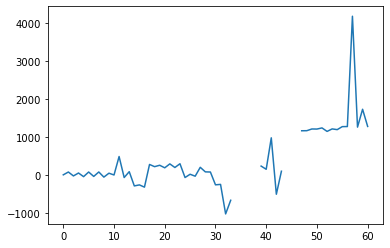

In [72]:
# import plotly.express as px
# fig = px.scatter(df,y="score")
# fig.show()

import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(score)

fig.savefig("images/matplot.png")
plt.show()


In [87]:
import chess
import chess.engine

def stockfish_evaluation(board, color='white', time_limit = 0.01):
    engine = chess.engine.SimpleEngine.popen_uci("/usr/games/stockfish")
    info = engine.analyse(board, chess.engine.Limit(time=time_limit))
    if color == 'white':
        score = info['score'].white().score()
    else:
        score = info['score'].black().score()
    engine.quit()
    return score

pgn = open('games/slevin48_vs_GraciasSenior_2020.11.22.pgn')
first_game = chess.pgn.read_game(pgn)

# Move 48
board = first_game.board()
moves = [move for move in first_game.mainline_moves()]

# Iterate through all moves and play them on a board
for move in moves[0:48]:
    board.push(move)
result = stockfish_evaluation(board)
print(result)

1243
